In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('monthly-car-sales.csv')
df

Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]

In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df

Month  Sales
0   1960-01-01   6550
1   1960-02-01   8728
2   1960-03-01  12026
3   1960-04-01  14395
4   1960-05-01  14587
..         ...    ...
103 1968-08-01  16722
104 1968-09-01  14385
105 1968-10-01  21342
106 1968-11-01  17180
107 1968-12-01  14577

[108 rows x 2 columns]

<AxesSubplot:xlabel='Month'>

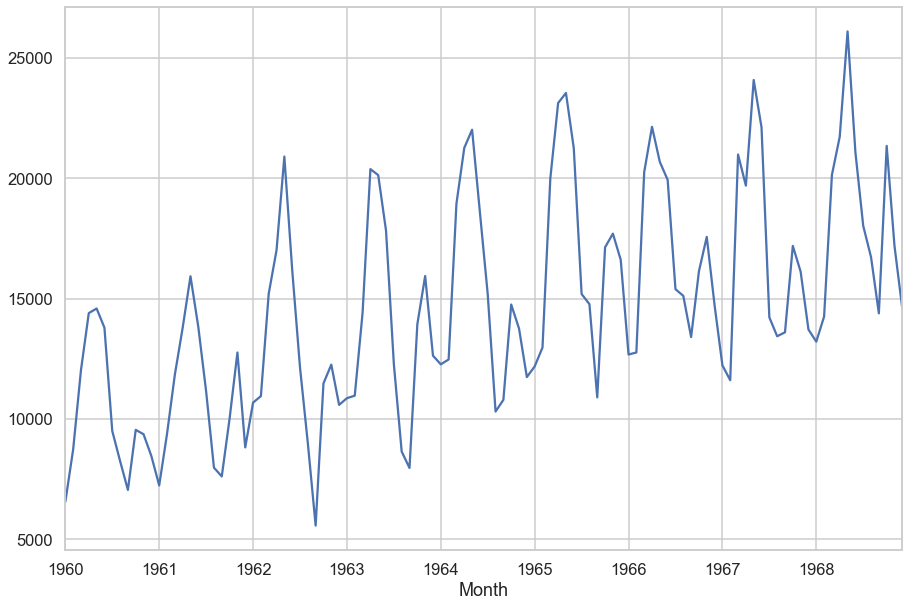

In [5]:
s = pd.Series(index = df['Month'], data = df['Sales'].values)
s.plot()

In [6]:
result = seasonal_decompose(s, model='mul')

<AxesSubplot:xlabel='Month'>

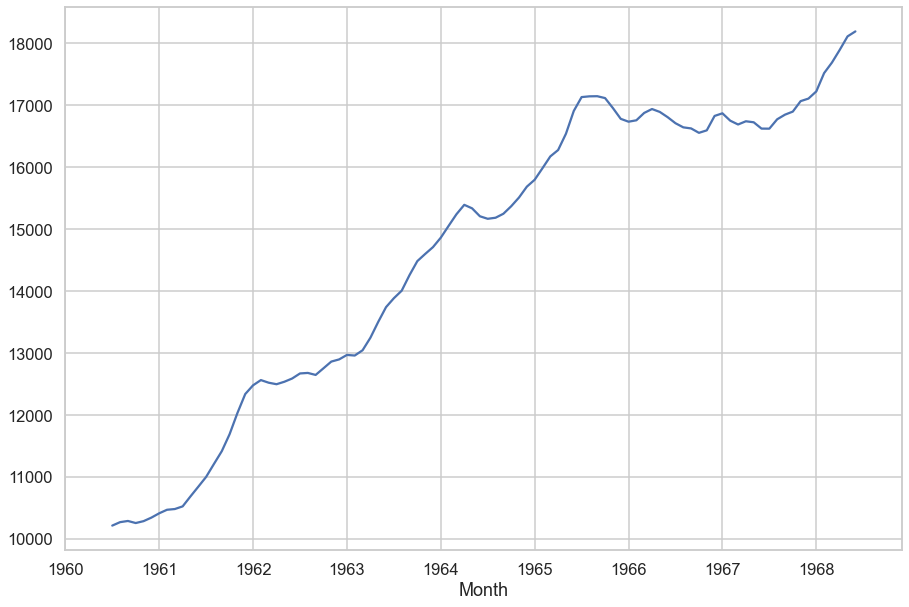

In [20]:
result.trend.plot()

<AxesSubplot:xlabel='Month'>

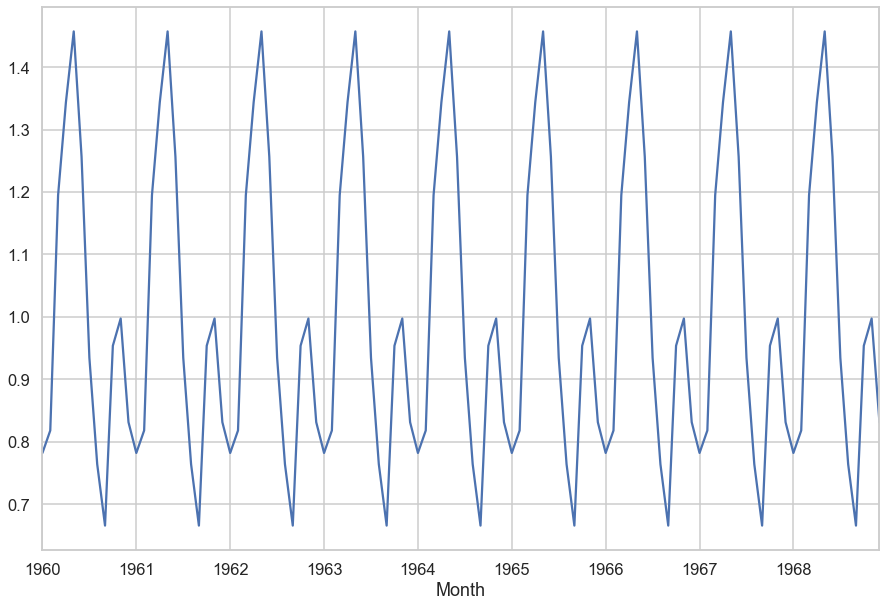

In [21]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

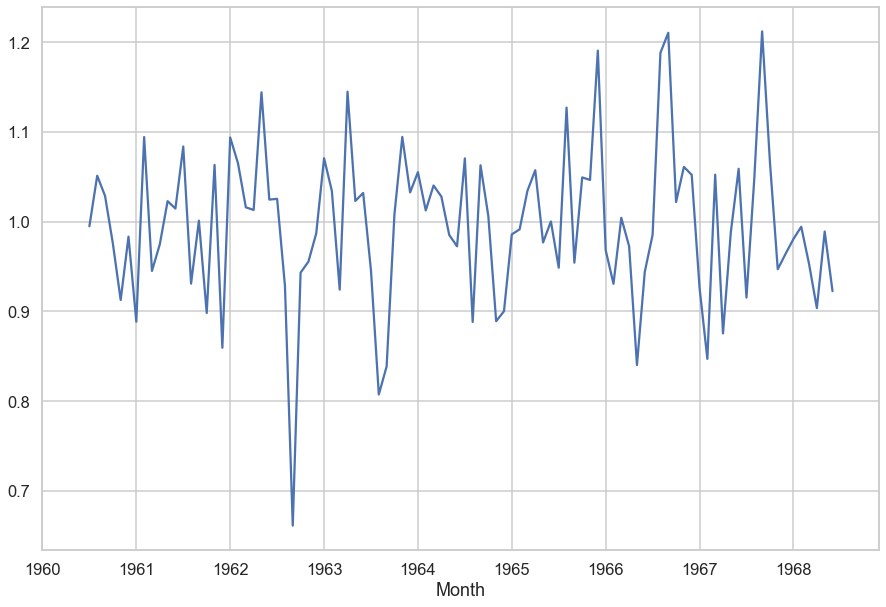

In [22]:
result.resid.plot()

In [7]:
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode, iplot

iplot(Figure(data=Scatter(y=s)))

In [8]:
def plot(test_data, pred_data):
    trace1 = Scatter(y = test_data.values.flatten(), 
                    name = 'Original')
    trace2 = Scatter(y = pred_data.values.flatten(), 
                    name = 'Prediction')
    name = np.round(r2_score(test_data, pred_data))
    
    iplot(Figure(data = [trace1, trace2], 
                layout = Layout(title = name)))

In [9]:
train, test = s[:-22], s[-22:]

In [10]:
model = SimpleExpSmoothing(train)
model_fit = model.fit(optimized=True)

pred_train = model_fit.fittedvalues

model_fit.summary()

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                   None   No. Observations:                   86
Model:             SimpleExpSmoothing   SSE                      809608111.783
Optimized:                       True   AIC                           1384.963
Trend:                           None   BIC                           1389.872
Seasonal:                        None   AICC                          1385.457
Seasonal Periods:                None   Date:                 Tue, 28 Jun 2022
Box-Cox:                        False   Time:                         23:16:34
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              6550.0000                  l.0                 True
------------------------------------------------------------------------------
"""

In [11]:
plot(train, pred_train)

In [12]:
pred_test = model_fit.forecast(len(test))

plot(test, pred_test)

In [13]:
model = Holt(train)
model_fit = model.fit(optimized=True)

pred_train = model_fit.fittedvalues

model_fit.summary()

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                   None   No. Observations:                   86
Model:                           Holt   SSE                      885999993.692
Optimized:                       True   AIC                           1396.718
Trend:                       Additive   BIC                           1406.535
Seasonal:                        None   AICC                          1397.781
Seasonal Periods:                None   Date:                 Tue, 28 Jun 2022
Box-Cox:                        False   Time:                         23:16:34
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.0473810                 beta                 True
initial_level              6550.0000                  l.0                 True
initial_trend              2178.0000                  b.0                 True
------------------------------------------------------------------------------
"""

In [14]:
pred_test = model_fit.forecast(len(test))

plot(test, pred_test)

In [15]:
model = ExponentialSmoothing(train, 
                            damped_trend = True, 
                            trend = 'additive', 
                            seasonal = 'additive',
                            seasonal_periods = 7)
model_fit = model.fit(optimized=True)

pred_train = model_fit.fittedvalues

model_fit.summary()

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                     None   No. Observations:                   86
Model:             ExponentialSmoothing   SSE                      905834950.610
Optimized:                         True   AIC                           1414.622
Trend:                         Additive   BIC                           1444.074
Seasonal:                      Additive   AICC                          1420.537
Seasonal Periods:                     7   Date:                 Tue, 28 Jun 2022
Box-Cox:                          False   Time:                         23:16:35
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9950000                alpha                 True
smoothing_trend                  0.0001                 beta                 True
smoothing_seasonal            0.0050000                gamma                 True
initial_level                 11903.800                  l.0                 True
initial_trend                -325.35771                  b.0                 True
damping_trend                 0.9900000                  phi                 True
initial_seasons.0             1012.5551                  s.0                 True
initial_seasons.1             1033.1622                  s.1                 True
initial_seasons.2             274.16224                  s.2                 True
initial_seasons.3            -9.3306122                  s.3                 True
initial_seasons.4            -376.51633                  s.4                 True
initial_seasons.5            -876.05204                  s.5                 True
initial_seasons.6            -1057.9806                  s.6                 True
---------------------------------------------------------------------------------
"""

In [16]:
pred_test = model_fit.forecast(len(test))

plot(test, pred_test)

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



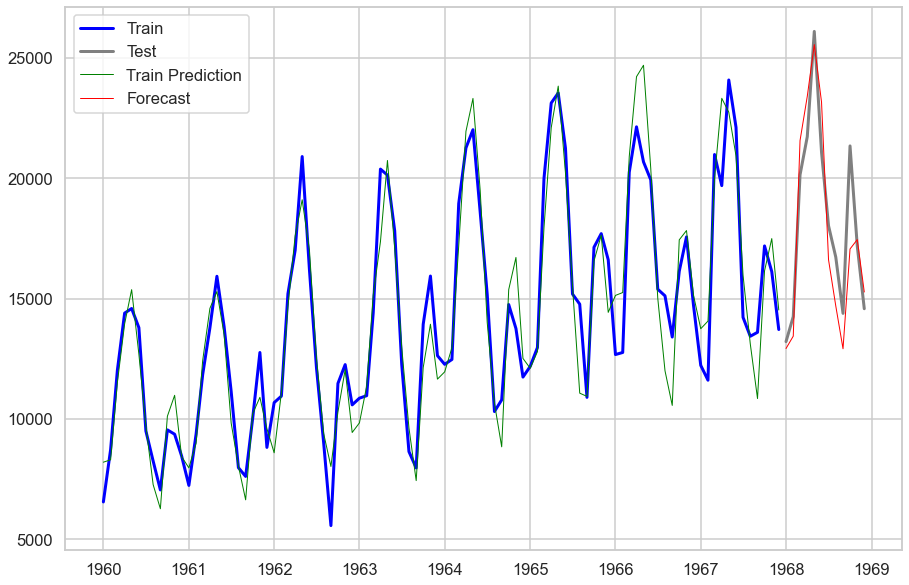

In [29]:
train, test = s[:-12], s[-12:]

model = ExponentialSmoothing(train, 
                            damped_trend = True, 
                            trend = 'mul', 
                            seasonal = 'mul',
                            seasonal_periods = 12)
model_fit = model.fit(optimized=True)

pred_train = model_fit.fittedvalues

pred_test = model_fit.forecast(len(test))

fig, ax = plt.subplots()
ax.plot(train, linewidth = 3, color='blue',label = 'Train')
ax.plot(test, linewidth = 3, color = 'grey', label ='Test')
ax.plot(pred_train, linewidth = 1, color = 'green', label ='Train Prediction')
ax.plot(pred_test, linewidth = 1, color = 'red', label ='Forecast')
ax.legend()
plt.show()



In [30]:
mae = mean_absolute_error(test, pred_test)
r2 = r2_score(test,pred_test)
print('mae:', mae, 'r2:', r2)

plot(test, pred_test)

mae: 1415.433578078877 r2: 0.7777951811989029


48 12 48
mae: 1054.308736633118 r2: 0.8954381729932172


/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



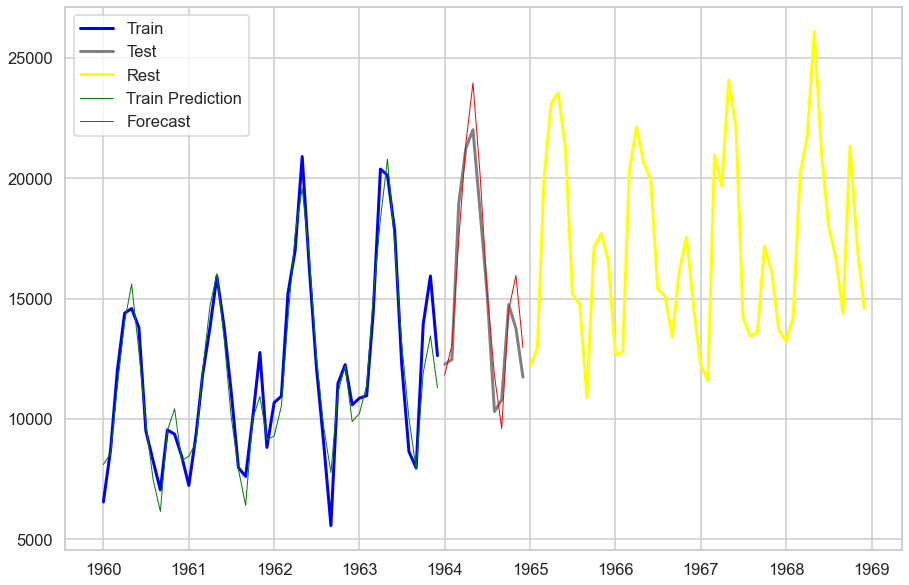

60 12 36
mae: 1190.7764725134252 r2: 0.8659272143612495


/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



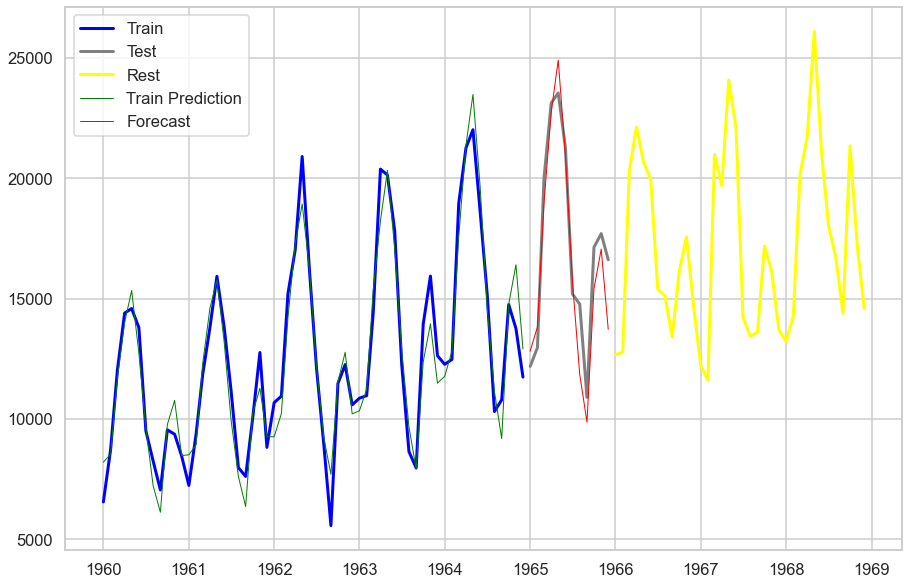

72 12 24
mae: 3487.299884583945 r2: -0.671535878877128


/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



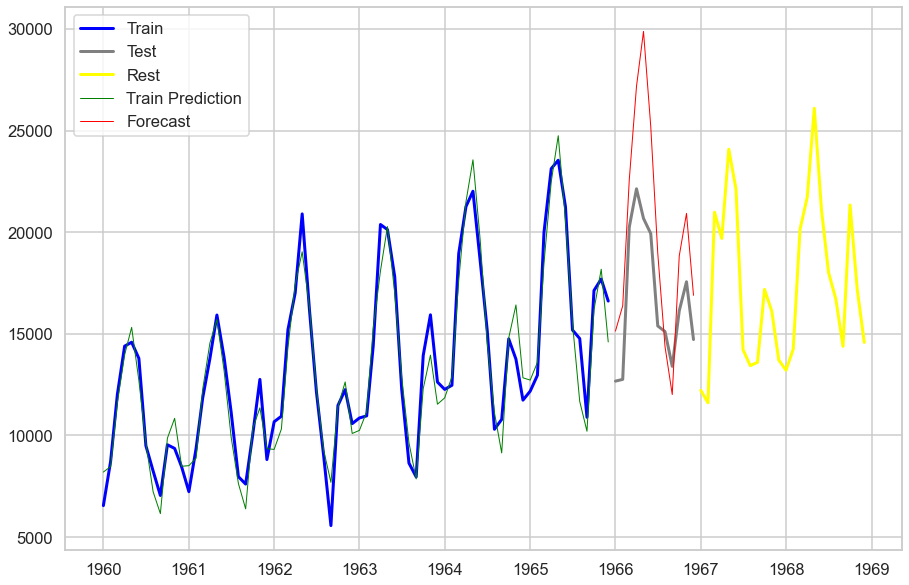

84 12 12
mae: 2724.663634800428 r2: 0.3787838023320662


/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



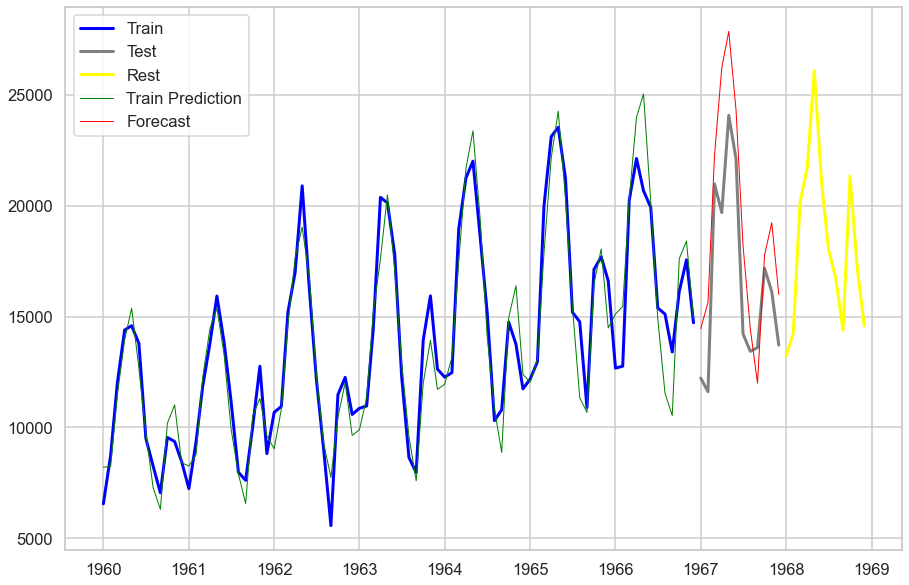

96 12 0
mae: 1415.433578078877 r2: 0.7777951811989029


/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/Users/aleksandrvolkov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



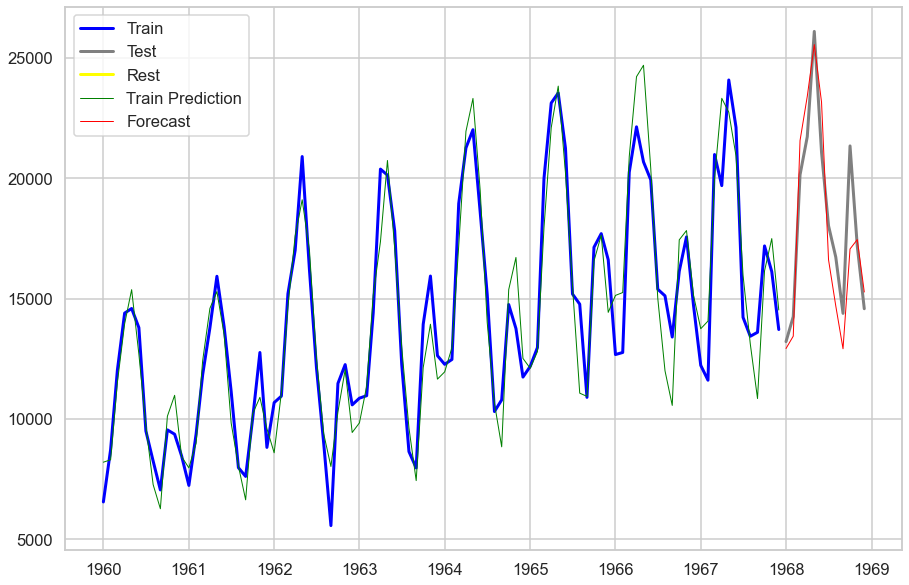

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:                     None   No. Observations:                   96
Model:             ExponentialSmoothing   SSE                      198319102.173
Optimized:                         True   AIC                           1429.940
Trend:                   Multiplicative   BIC                           1473.534
Seasonal:                Multiplicative   AICC                          1439.940
Seasonal Periods:                    12   Date:                 Tue, 28 Jun 2022
Box-Cox:                          False   Time:                         23:16:37
Box-Cox Coeff.:                    None                                         
=================================================================================
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2878571                alpha                 True
smoothing_trend                  0.0001                 beta                 True
smoothing_seasonal            0.2967262                gamma                 True
initial_level                 10165.331                  l.0                 True
initial_trend                 1.0033691                  b.0                 True
damping_trend                 0.9900000                  phi                 True
initial_seasons.0             0.8041781                  s.0                 True
initial_seasons.1             0.8611557                  s.1                 True
initial_seasons.2             1.1738242                  s.2                 True
initial_seasons.3             1.3990073                  s.3                 True
initial_seasons.4             1.5224731                  s.4                 True
initial_seasons.5             1.2713636                  s.5                 True
initial_seasons.6             0.9471264                  s.6                 True
initial_seasons.7             0.7110789                  s.7                 True
initial_seasons.8             0.5882013                  s.8                 True
initial_seasons.9             0.9131631                  s.9                 True
initial_seasons.10            1.0048316                 s.10                 True
initial_seasons.11            0.8035967                 s.11                 True
---------------------------------------------------------------------------------
"""

In [19]:
n_splits = 5
test_size = 12
size = len(s)

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    
    train = s[0:idx]
    test = s[idx: idx + test_size]
    rest = s[idx + test_size:]
    
    print(len(train), len(test), len(rest))
    
    model = ExponentialSmoothing(train, 
                            damped_trend = True, 
                            trend = 'mul', 
                            seasonal = 'mul',
                            seasonal_periods = 12)
    model_fit = model.fit(optimized=True)

    pred_train = model_fit.fittedvalues
    
    pred_test = model_fit.forecast(len(test))
    
    mae = mean_absolute_error(test, pred_test)
    r2 = r2_score(test,pred_test)
    print('mae:', mae, 'r2:', r2)

    fig, ax = plt.subplots()
    ax.plot(train, linewidth = 3, color='blue',label = 'Train')
    ax.plot(test, linewidth = 3, color = 'grey', label ='Test')
    ax.plot(rest, linewidth = 3, color = 'yellow', label ='Rest')
    ax.plot(pred_train, linewidth = 1, color = 'green', label ='Train Prediction')
    ax.plot(pred_test, linewidth = 1, color = 'red', label ='Forecast')
    ax.legend()
    plt.show()

model_fit.summary()

In [ ]:
# Методом подбора обнаружил, что мултипликативная модель с затухающим трендом
# предсказывает на тестовых данных лучше по сравнению с адитивной моделью с незатухающим трендом
# хотя показатель 'MAE' у неё немного больше по сравнению с мультипликативной моделью, но 'R^2' лучше
# Также на графике видно что мультипликативная модель лучше предсказывает поведение данных